In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
rides = pd.read_csv('day.csv')
videos = pd.read_csv('transcoding_mesurment.tsv',sep='\t')

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
videos.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


## Q1

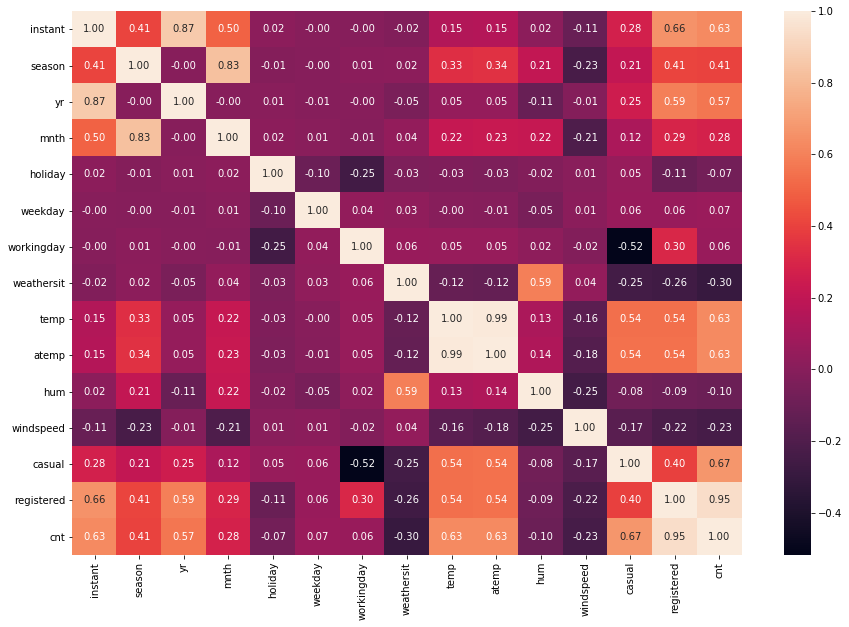

In [5]:
rides_corr = rides.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(rides_corr,annot=True,fmt='.2f')

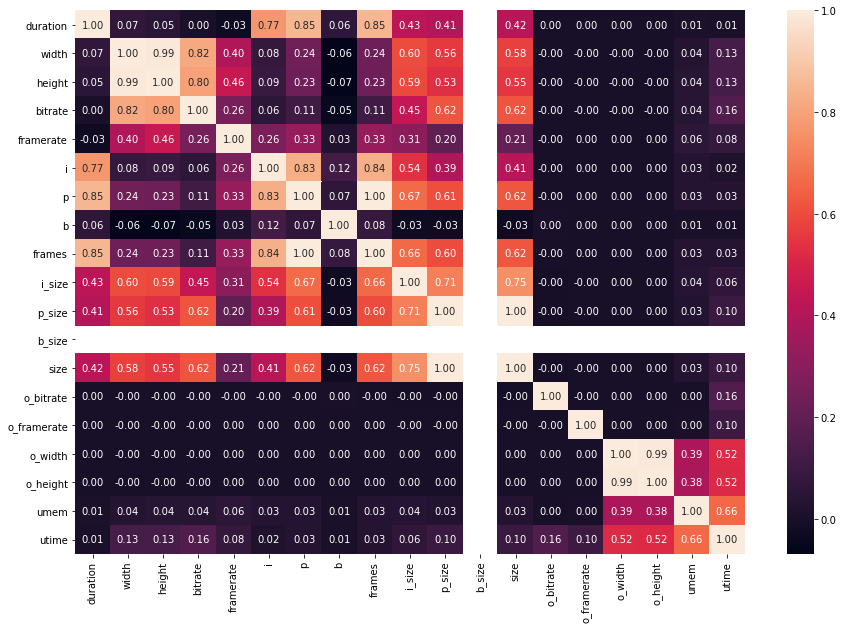

In [6]:
videos_corr = videos.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(videos_corr,annot=True,fmt='.2f')

The three target variables for the bike sharing dataset are count of casual users, count of registered users and total number of users. All these three target variables have high positive correlation with the normalized temperature and feeling normalized temperature. Which means higher the temperature on a particular day, more the number of users that day. 

## Q2

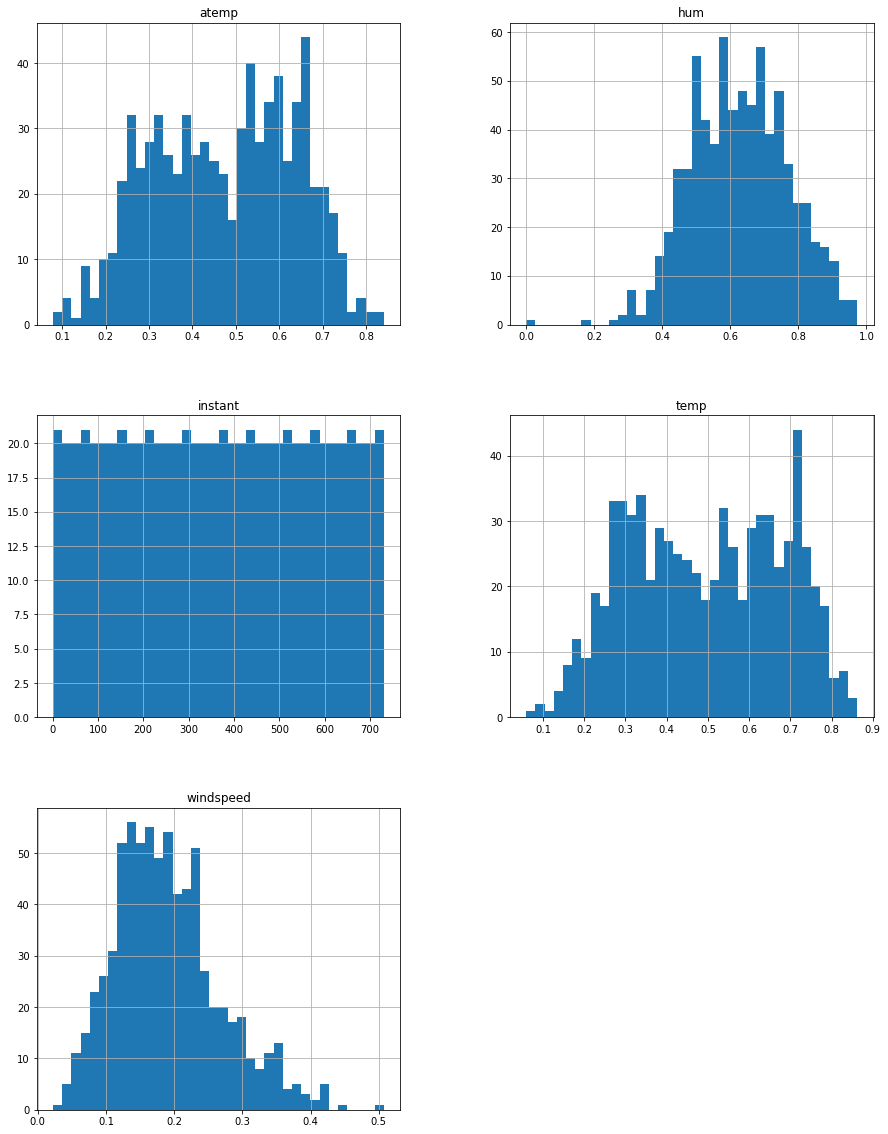

In [7]:
rides['dteday'] = pd.to_datetime(rides.dteday)

# categorical variables
rides['season'] = rides.season.astype('category')
rides['holiday'] = rides.holiday.astype('category')
rides['weekday'] = rides.weekday.astype('category')
rides['weathersit'] = rides.weathersit.astype('category')
rides['workingday'] = rides.workingday.astype('category')
rides['mnth'] = rides.mnth.astype('category')
rides['yr'] = rides.yr.astype('category')

numerical_features_rides = ['instant','temp','atemp','hum','windspeed']

hist = rides[numerical_features_rides].hist(bins=36,figsize=(15,20))

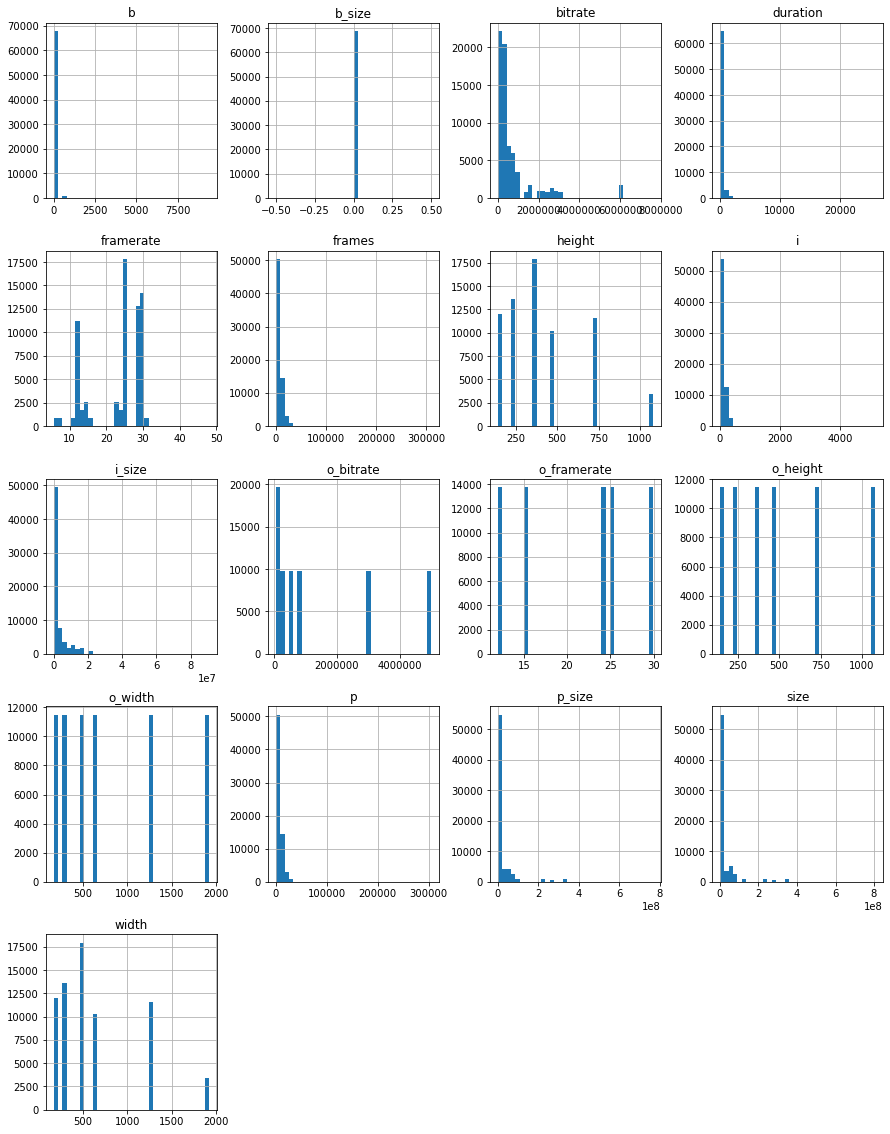

In [8]:
videos['codec'] = videos.codec.astype('category')
videos['o_codec'] = videos.o_codec.astype('category')

numerical_features_videos = videos.columns.drop(['codec','o_codec','utime','umem'])
hist = videos[numerical_features_videos].hist(bins=36,figsize=(15,20))

If the distribution of a feature has high skewness, we can use some transformation like a logarithmic transformation to reduce the skewness of the feature

## Q3

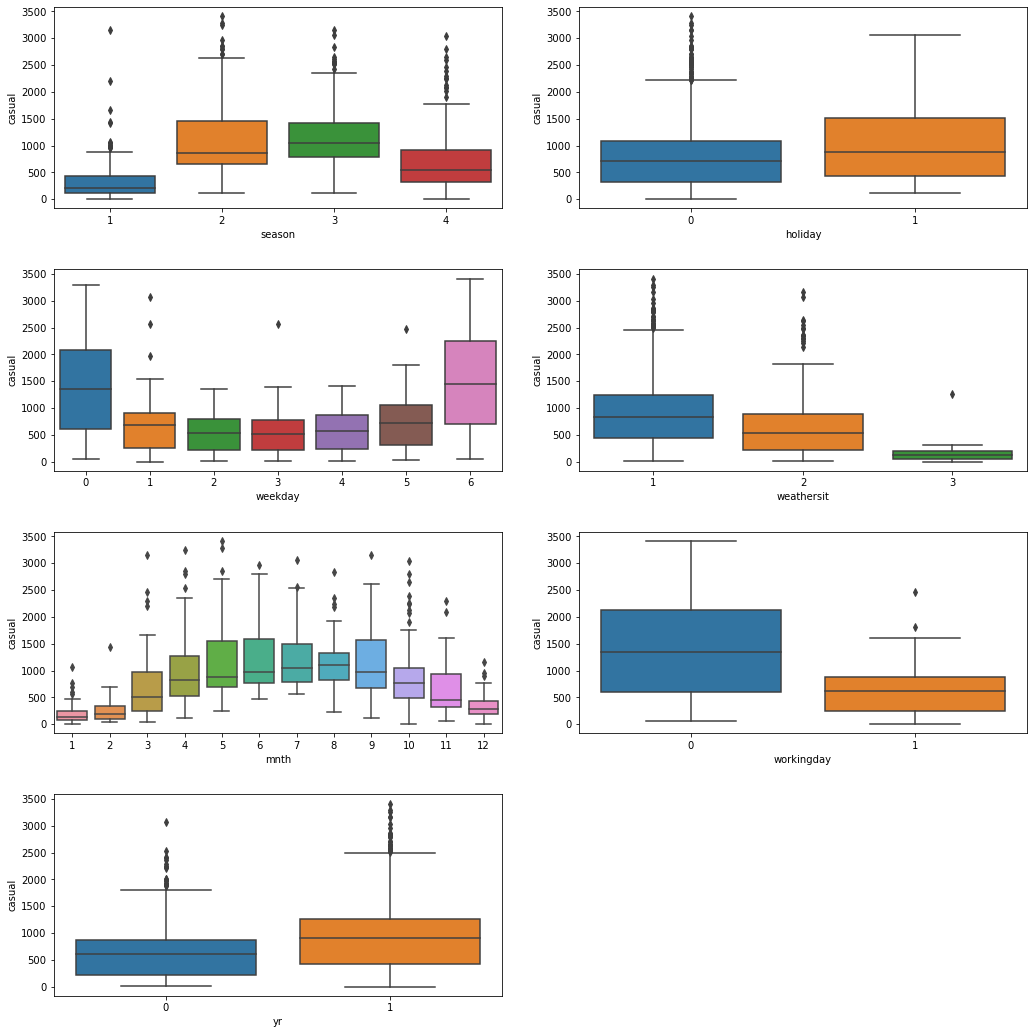

In [9]:
#categorical features vs casual
categorical_features_rides = ['season','holiday','weekday','weathersit','mnth','workingday','yr']
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['casual',col]],x=col,y='casual',ax=ax)
    
fig.tight_layout(pad=3.0)

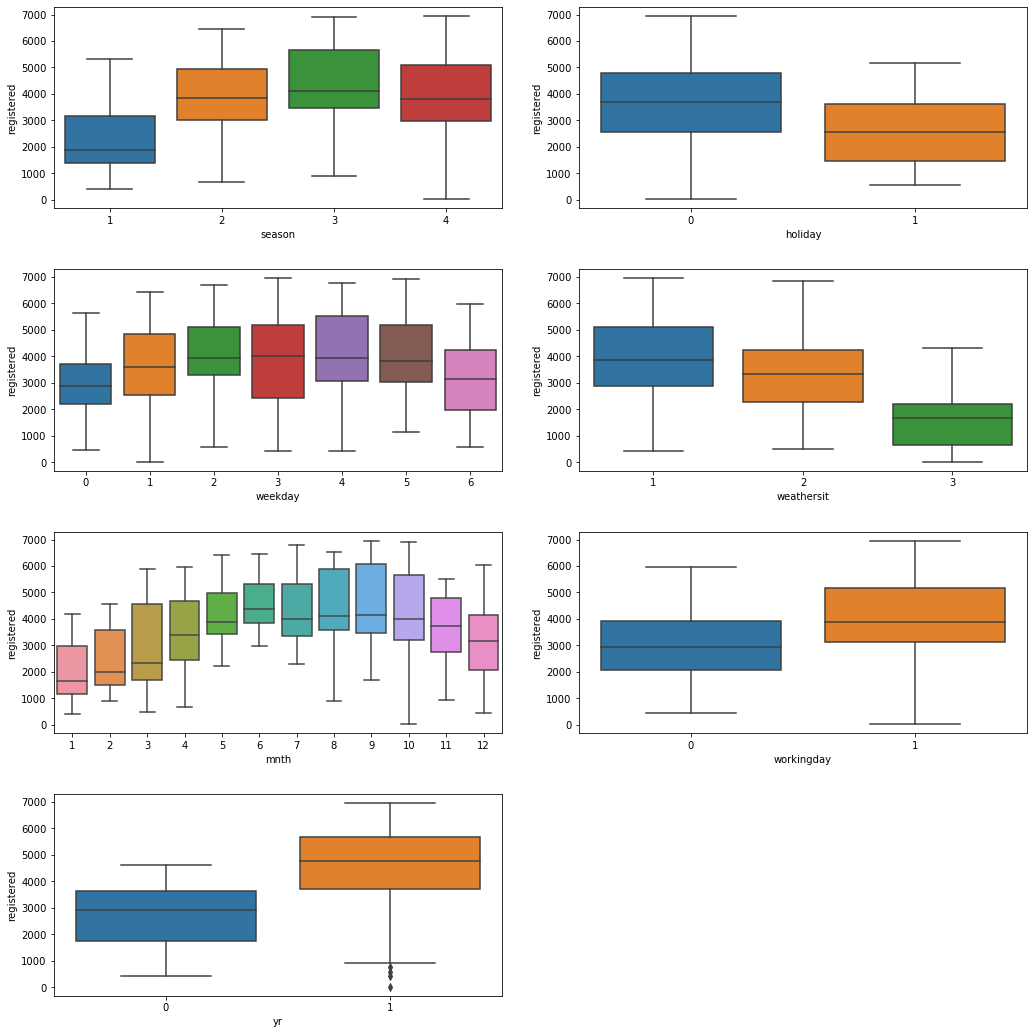

In [10]:
#categorical features vs registered
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['registered',col]],x=col,y='registered',ax=ax)
    
fig.tight_layout(pad=3.0)

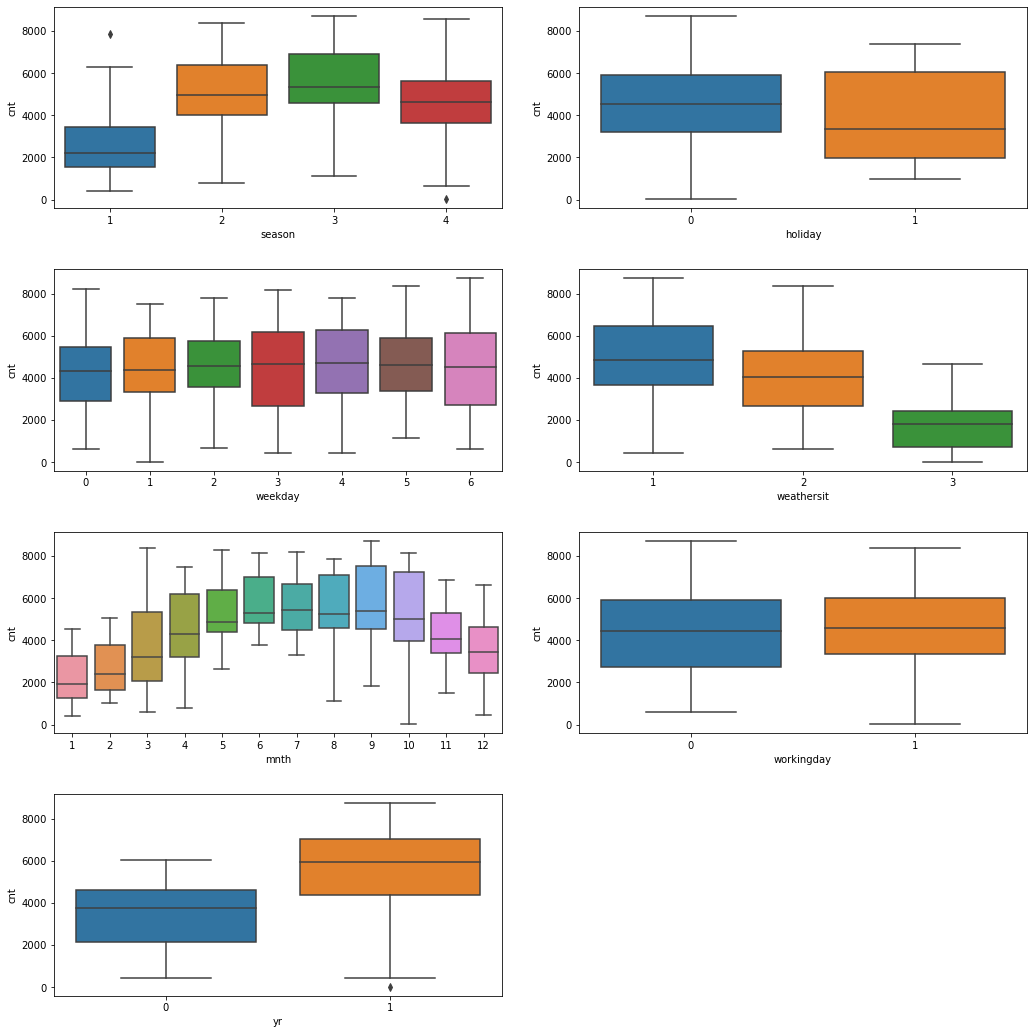

In [11]:
#categorical features vs cnt
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['cnt',col]],x=col,y='cnt',ax=ax)
    
fig.tight_layout(pad=3.0)

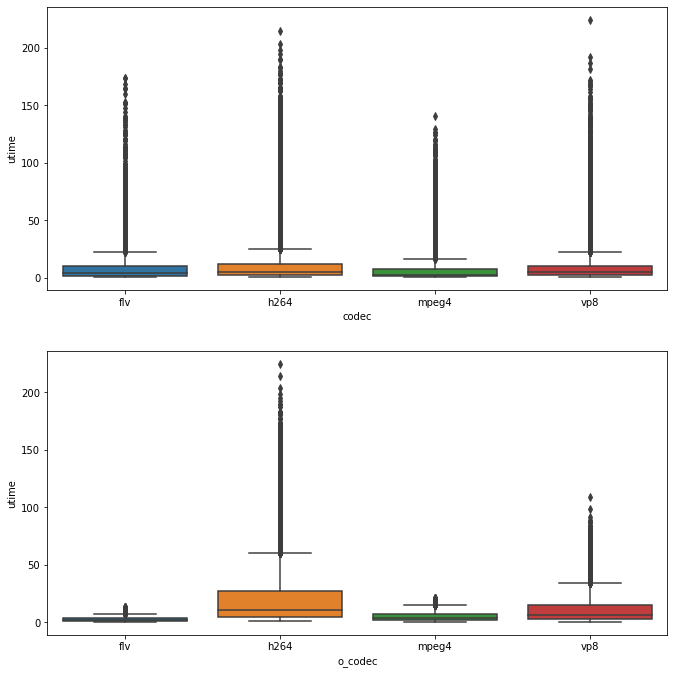

In [12]:
#categorical features vs utime

categorical_features_videos = ['codec','o_codec']

fig, axes = plt.subplots(nrows=2,ncols=1,squeeze=False)
axes_flatten = axes.flatten()

fig.set_figheight(10)
fig.set_figwidth(10)
for ax,col in zip(axes_flatten,categorical_features_videos):
    sns.boxplot(data=videos[['utime',col]],x=col,y='utime',ax=ax)
    
fig.tight_layout(pad=3.0)

## Q4

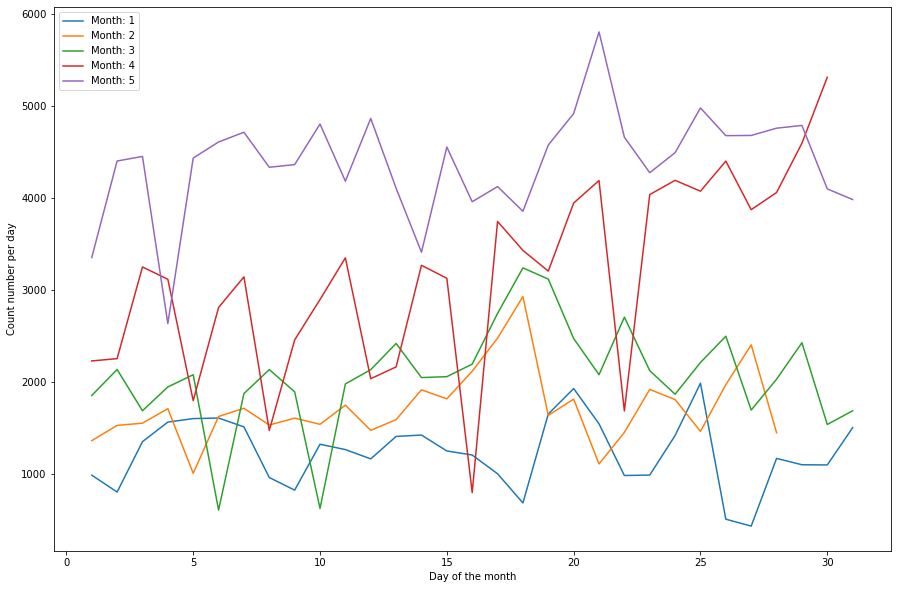

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
for i in range(1,6):
    get = rides.loc[(rides['mnth']==i) & (rides['yr']==0)]['cnt']
    ax.plot(np.arange(1,len(get)+1),get, label='Month: ' + str(i))

ax.set(xlabel='Day of the month', ylabel='Count number per day')
    
ax.legend()
plt.show()

## Q5

Mean transcoding time = 9.996 seconds
Median transcoding time = 4.408 seconds


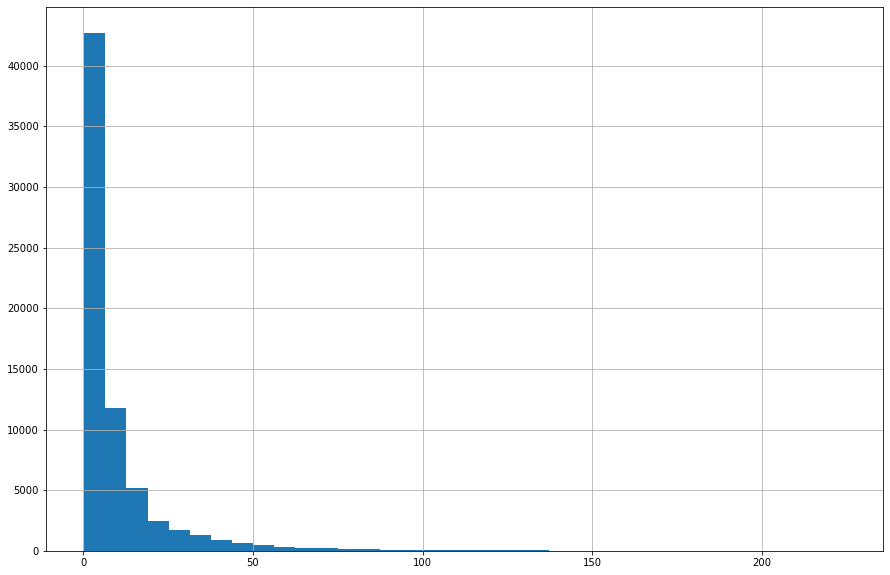

In [14]:
hist = videos['utime'].hist(bins=36,figsize=(15,10))
trns_mean = np.mean(videos['utime'])
trns_median = np.median(videos['utime'])

print('Mean transcoding time = {0:.3f} seconds'.format(trns_mean))
print('Median transcoding time = {0:.3f} seconds'.format(trns_median))

The transcoding time is positively skewed distribution as mean > median.

## Q6

Solution: The scalar encoding can be used where the categorical features have a natural ordering of values. For example in the categorical feature of 'Quality' with values {Poor, Fair, Typical, Good, Excellent}, using scalar encoding with integers from 1 through 5 also retains the information of how good the quality is in terms of magnitude of the number. Machine learning algorithms may be able to understand and harness this relationship. While, by using the one-hot encoding we lose the information of the natural ordering of values. In contrast, using the scalar encoding for categorical variables where no such ordinal relationship exists may result in poor performance or unexpected results. Thus, in such cases it is better to use one hot encoding which does not assume any such ordinal relationship.

Preprocessing the categorical data

In [15]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
categorical_rides = ['holiday','workingday']
rides_encode = pd.get_dummies(data = rides, prefix = None, prefix_sep='_',columns = categorical_rides, drop_first=False)

In [17]:
rides_encode.head()

,instant,dteday,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1
0,1,2011-01-01,1,0,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,1,0
1,2,2011-01-02,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,1,0
2,3,2011-01-03,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,1
3,4,2011-01-04,1,0,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,1
4,5,2011-01-05,1,0,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,1


In [18]:
ridesStandard = rides_encode.drop(columns=['instant','dteday'], inplace=False)

standard_columns_rides = ['season','yr','mnth','weekday','temp','atemp','hum','windspeed','weathersit']
standard_scaler = preprocessing.StandardScaler()
ridesStandard[standard_columns_rides] = standard_scaler.fit_transform(ridesStandard[standard_columns_rides])

In [19]:
ridesStandard.head()

,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1
0,-1.348213,-1.001369,-1.600161,1.498809,1.110427,-0.826662,-0.679946,1.250171,-0.387892,331,654,985,1,0,1,0
1,-1.348213,-1.001369,-1.600161,-1.496077,1.110427,-0.721095,-0.740652,0.479113,0.749602,131,670,801,1,0,1,0
2,-1.348213,-1.001369,-1.600161,-0.996930,-0.726048,-1.634657,-1.749767,-1.339274,0.746632,120,1229,1349,1,0,0,1
3,-1.348213,-1.001369,-1.600161,-0.497782,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829,108,1454,1562,1,0,0,1
4,-1.348213,-1.001369,-1.600161,0.001366,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307,82,1518,1600,1,0,0,1


Text(0.5, 1.0, 'Mutual Information between each feature and total count')

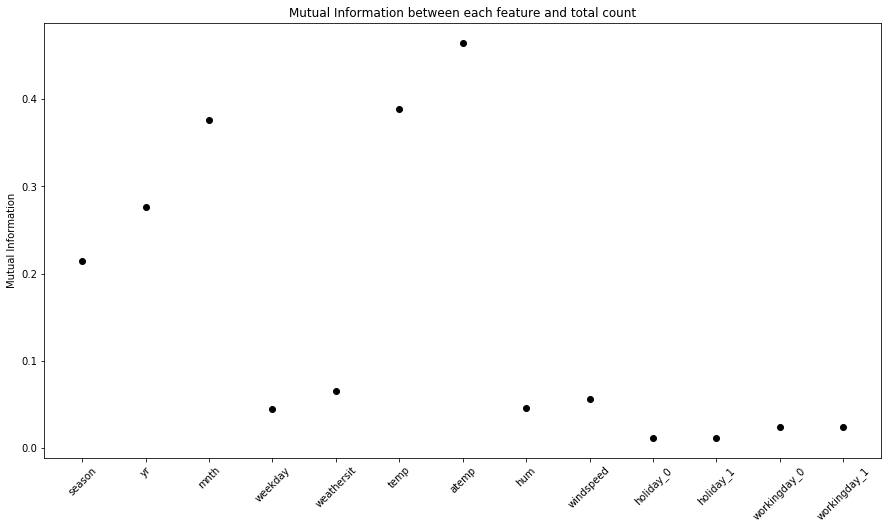

In [20]:
X_rides = ridesStandard.drop(columns=['casual','registered','cnt'])
Y_rides = ridesStandard['cnt']

mi_rides = mutual_info_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,mi_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and total count')

Text(0.5, 1.0, 'F scores between each feature and total count')

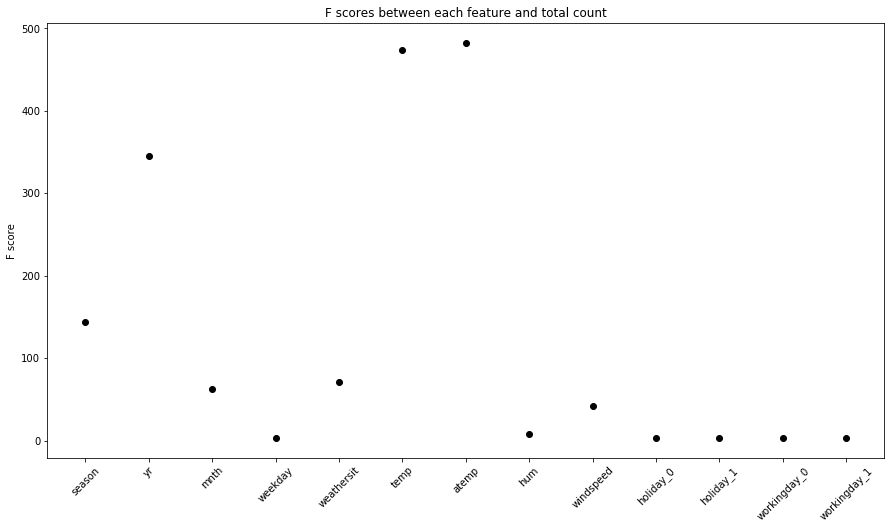

In [21]:
fval_rides, _ = f_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,fval_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and total count')

In [22]:
categorical_videos = ['codec','o_codec']
videos_encode = pd.get_dummies(data = videos, prefix = None, prefix_sep='_',columns = categorical_videos, drop_first=False)

In [23]:
videos_encode.head()

,id,duration,width,height,bitrate,framerate,i,p,b,frames,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,22508,0.612,0,0,1,0,0,0,1,0
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,25164,0.980,0,0,1,0,0,0,1,0
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,29228,1.216,0,0,1,0,0,0,1,0
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,34316,1.692,0,0,1,0,0,0,1,0
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,58528,3.456,0,0,1,0,0,0,1,0


In [24]:
videos_encode_ds = videos_encode.sample(n=5000,random_state=42)
videosStandard = videos_encode.drop(columns='id', inplace=False)
videosStandard_ds = videos_encode_ds.drop(columns='id', inplace=False)

standard_columns_videos = videosStandard_ds.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime'])
standard_scaler = preprocessing.StandardScaler()
videosStandard_ds[standard_columns_videos] = standard_scaler.fit_transform(videosStandard_ds[standard_columns_videos])

In [25]:
videosStandard_ds.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
64402,-0.312494,-0.66104,-0.722037,-0.410263,0.797146,0.035026,-0.096219,-0.07142,-0.096343,-0.465168,...,-0.039797,2.728,1,0,0,0,1,0,0,0
39863,0.764532,-0.31467,-0.221997,-0.355353,0.242634,1.880030,0.910081,-0.07142,0.922180,-0.327497,...,-0.057949,46.167,0,1,0,0,0,0,0,1
40898,-0.059702,0.03170,0.278042,-0.038542,0.944502,-0.147047,0.246217,-0.07142,0.239270,-0.220043,...,-0.057949,2.096,0,0,0,1,1,0,0,0
29064,-0.137042,-0.66104,-0.722037,-0.487799,0.797146,0.326342,0.135850,-0.07142,0.136726,-0.464417,...,-0.064216,0.708,0,1,0,0,1,0,0,0
26550,0.366743,0.03170,0.278042,-0.044415,0.797146,1.260983,0.794714,-0.07142,0.799885,-0.005231,...,-0.075799,1.504,0,1,0,0,1,0,0,0


Text(0.5, 1.0, 'Mutual Information between each feature and transcoding time')

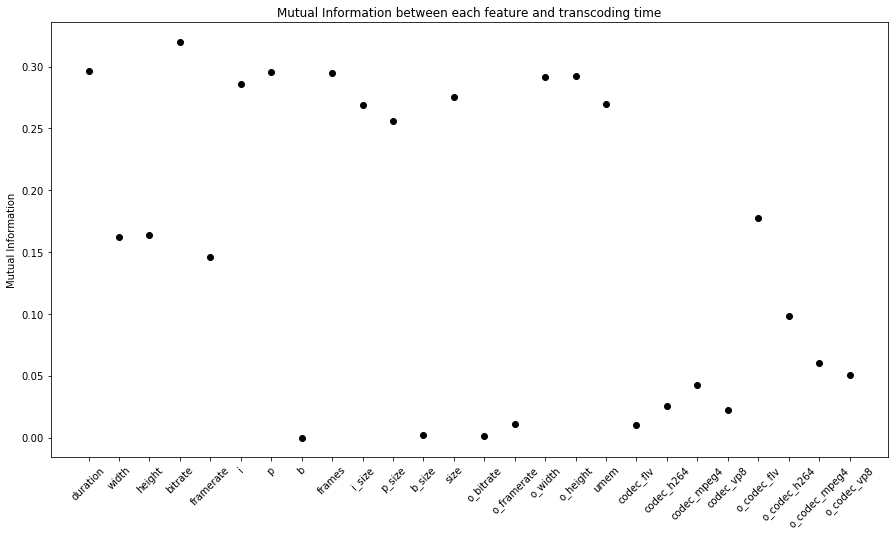

In [26]:
X_videos_ds = videosStandard_ds.drop(columns=['utime'])
Y_videos_ds = videosStandard_ds['utime']

X_videos_columns = X_videos_ds.columns

mi_videos = mutual_info_regression(X=X_videos_ds,y=Y_videos_ds)

plt.figure(figsize = (15,8))
plt.plot(X_videos_ds.columns,mi_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and transcoding time')

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'F scores between each feature and transcoding time')

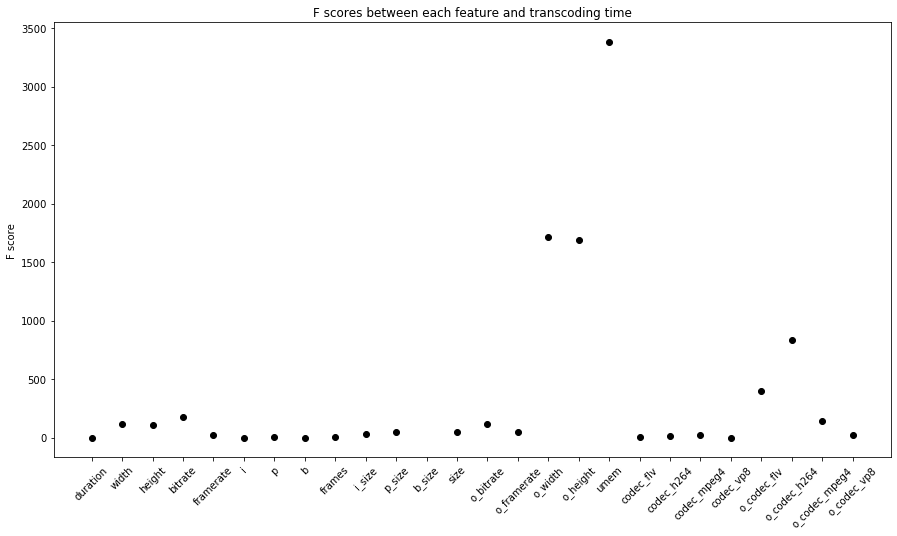

In [27]:
fval_videos, _ = f_regression(X=X_videos_ds,y=Y_videos_ds)

plt.figure(figsize = (15,8))
plt.plot(X_videos_ds.columns,fval_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and transcoding time')

Without Feature Selection

In [28]:
#bike sharing dataset
rides_features_drop_wfd = ['casual','registered','cnt']
X_ridesFinal_wfd = ridesStandard.drop(columns=rides_features_drop_wfd)
y_ridesFinal_wfd = ridesStandard['cnt']

x_train_rides_wfd, x_test_rides_wfd, y_train_rides_wfd, y_test_rides_wfd = train_test_split(X_ridesFinal_wfd, y_ridesFinal_wfd, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE without feature selection for bike sharing dataset:  881.5148409484165
Ridge regression RMSE:  851.2292371532809  alpha:  8.697490026177835
Lasso regression RMSE:  858.3025100155834  alpha:  1.873817422860385


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha without feature selection for Bike sharing dataset')

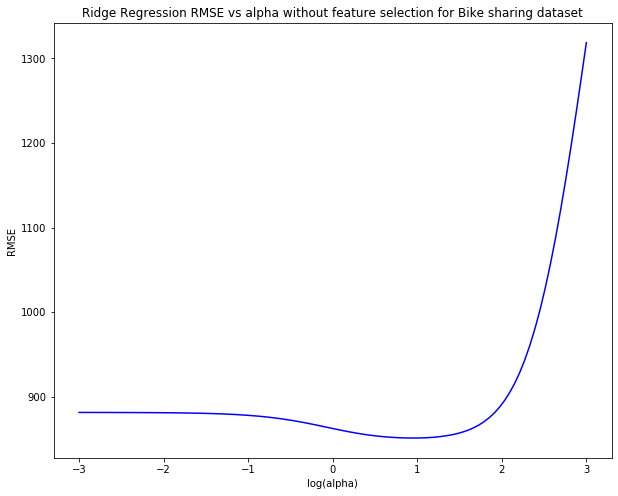

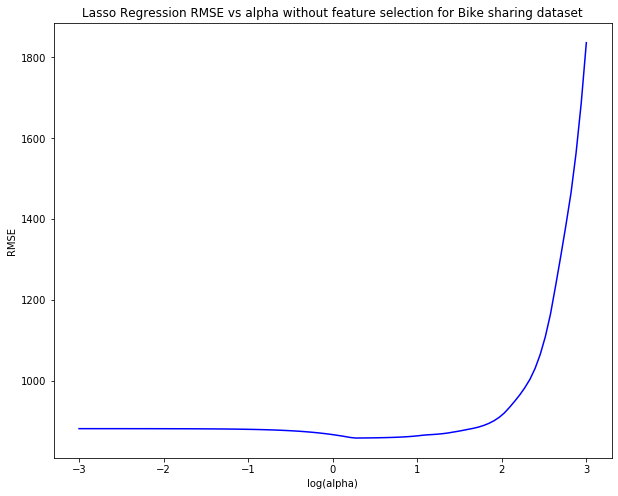

In [29]:
lr = LinearRegression()
lr.fit(x_train_rides_wfd, y_train_rides_wfd)
y_predict_rides_wfd = lr.predict(x_test_rides_wfd)
rmselr_rides_wfd = mean_squared_error(y_true= y_test_rides_wfd,y_pred= y_predict_rides_wfd, squared = False)
print('No normalization Linear regression RMSE without feature selection for bike sharing dataset: ', rmselr_rides_wfd)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_rides_wfd = np.zeros_like(alpha_array)
rmsell_rides_wfd = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides_wfd, y_train_rides_wfd)
    y_predict_rides_wfd = rr.predict(x_test_rides_wfd)
    rmserr_rides_wfd[it] = mean_squared_error(y_true= y_test_rides_wfd,y_pred= y_predict_rides_wfd, squared = False)

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides_wfd, y_train_rides_wfd)
    y_predict_rides_wfd = ll.predict(x_test_rides_wfd)
    rmsell_rides_wfd[it] = mean_squared_error(y_true= y_test_rides_wfd,y_pred= y_predict_rides_wfd, squared = False)
    
idxrr_min = np.argmin(rmserr_rides_wfd)
rmsebestrr_rides_wfd = rmserr_rides_wfd[idxrr_min]
Alphabestrr_rides_wfd = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_rides_wfd)
rmsebestll_rides_wfd = rmsell_rides_wfd[idxll_min]
Alphabestll_rides_wfd = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_rides_wfd, ' alpha: ', Alphabestrr_rides_wfd)
print('Lasso regression RMSE: ', rmsebestll_rides_wfd, ' alpha: ', Alphabestll_rides_wfd)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_rides_wfd,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha without feature selection for Bike sharing dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_rides_wfd,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha without feature selection for Bike sharing dataset')

In [30]:
#Video dataset
videos_features_drop_wfd = ['utime']
X_videosFinal_wfd = videosStandard_ds.drop(columns=videos_features_drop_wfd)
y_videosFinal_wfd = videosStandard_ds['utime']

x_train_videos_wfd, x_test_videos_wfd, y_train_videos_wfd, y_test_videos_wfd = train_test_split(X_videosFinal_wfd, y_videosFinal_wfd, test_size = 0.33, random_state = 42)

In [31]:
X_videosFinal_wfd.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,o_height,umem,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
64402,-0.312494,-0.66104,-0.722037,-0.410263,0.797146,0.035026,-0.096219,-0.07142,-0.096343,-0.465168,...,0.701877,-0.039797,1,0,0,0,1,0,0,0
39863,0.764532,-0.31467,-0.221997,-0.355353,0.242634,1.880030,0.910081,-0.07142,0.922180,-0.327497,...,1.852419,-0.057949,0,1,0,0,0,0,0,1
40898,-0.059702,0.03170,0.278042,-0.038542,0.944502,-0.147047,0.246217,-0.07142,0.239270,-0.220043,...,-0.448666,-0.057949,0,0,0,1,1,0,0,0
29064,-0.137042,-0.66104,-0.722037,-0.487799,0.797146,0.326342,0.135850,-0.07142,0.136726,-0.464417,...,-1.138991,-0.064216,0,1,0,0,1,0,0,0
26550,0.366743,0.03170,0.278042,-0.044415,0.797146,1.260983,0.794714,-0.07142,0.799885,-0.005231,...,-1.138991,-0.075799,0,1,0,0,1,0,0,0


No normalization Linear regression RMSE for video transcoding dataset:  9.403305995505484
Ridge regression RMSE:  9.397734630315322  alpha:  0.23101297000831605
Lasso regression RMSE:  9.398058260762193  alpha:  0.001


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha without feature selection for video transcoding dataset')

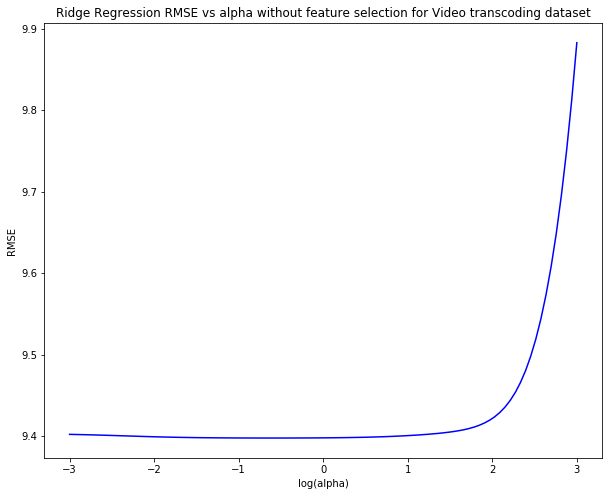

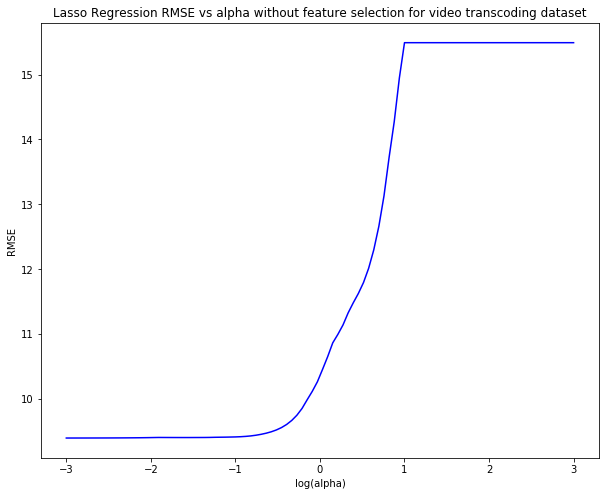

In [32]:
lr = LinearRegression()
lr.fit(x_train_videos_wfd, y_train_videos_wfd)
y_predict_videos_wfd = lr.predict(x_test_videos_wfd)
rmselr_videos_wfd = mean_squared_error(y_true= y_test_videos_wfd,y_pred= y_predict_videos_wfd, squared = False)
print('No normalization Linear regression RMSE for video transcoding dataset: ', rmselr_videos_wfd)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_videos_wfd = np.zeros_like(alpha_array)
rmsell_videos_wfd = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos_wfd, y_train_videos_wfd)
    y_predict_videos_wfd = rr.predict(x_test_videos_wfd)
    rmserr_videos_wfd[it] = mean_squared_error(y_true= y_test_videos_wfd,y_pred= y_predict_videos_wfd, squared = False)

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos_wfd, y_train_videos_wfd)
    y_predict_videos_wfd = ll.predict(x_test_videos_wfd)
    rmsell_videos_wfd[it] = mean_squared_error(y_true= y_test_videos_wfd,y_pred= y_predict_videos_wfd, squared = False)
    
idxrr_min = np.argmin(rmserr_videos_wfd)
rmsebestrr_videos_wfd = rmserr_videos_wfd[idxrr_min]
Alphabestrr_videos_wfd = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_videos_wfd)
rmsebestll_videos_wfd = rmsell_videos_wfd[idxll_min]
Alphabestll_videos_wfd = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_videos_wfd, ' alpha: ', Alphabestrr_videos_wfd)
print('Lasso regression RMSE: ', rmsebestll_videos_wfd, ' alpha: ', Alphabestll_videos_wfd)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_videos_wfd,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha without feature selection for Video transcoding dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_videos_wfd,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha without feature selection for video transcoding dataset')

In [33]:
#Feature Selection

rides_features_drop = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit','casual','registered','cnt']
X_ridesFinal = ridesStandard.drop(columns=rides_features_drop)
y_ridesFinal = ridesStandard['cnt']

In [34]:
X_ridesFinal.head()

,season,yr,mnth,temp,atemp
0,-1.348213,-1.001369,-1.600161,-0.826662,-0.679946
1,-1.348213,-1.001369,-1.600161,-0.721095,-0.740652
2,-1.348213,-1.001369,-1.600161,-1.634657,-1.749767
3,-1.348213,-1.001369,-1.600161,-1.614780,-1.610270
4,-1.348213,-1.001369,-1.600161,-1.467414,-1.504971


In [35]:
videos_features_drop = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime']
X_videosFinal = videosStandard_ds.drop(columns=videos_features_drop)
y_videosFinal = videosStandard_ds['utime']

In [36]:
X_videosFinal.head()

,duration,width,height,bitrate,framerate,i,p,frames,i_size,p_size,size,o_width,o_height,umem,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
64402,-0.312494,-0.66104,-0.722037,-0.410263,0.797146,0.035026,-0.096219,-0.096343,-0.465168,-0.330135,-0.347876,0.799593,0.701877,-0.039797,1,0,0,0
39863,0.764532,-0.31467,-0.221997,-0.355353,0.242634,1.880030,0.910081,0.922180,-0.327497,-0.100612,-0.120848,1.858950,1.852419,-0.057949,0,0,0,1
40898,-0.059702,0.03170,0.278042,-0.038542,0.944502,-0.147047,0.246217,0.239270,-0.220043,-0.038054,-0.053416,-0.524605,-0.448666,-0.057949,1,0,0,0
29064,-0.137042,-0.66104,-0.722037,-0.487799,0.797146,0.326342,0.135850,0.136726,-0.464417,-0.355506,-0.371703,-1.027799,-1.138991,-0.064216,1,0,0,0
26550,0.366743,0.03170,0.278042,-0.044415,0.797146,1.260983,0.794714,0.799885,-0.005231,0.119113,0.111616,-1.027799,-1.138991,-0.075799,1,0,0,0


Training Test Dataset split

In [37]:
x_train_rides, x_test_rides, y_train_rides, y_test_rides = train_test_split(X_ridesFinal, y_ridesFinal, test_size = 0.33, random_state = 42)

In [38]:
x_train_videos, x_test_videos, y_train_videos, y_test_videos = train_test_split(X_videosFinal, y_videosFinal, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE for bike sharing dataset:  1049.800529076941
Ridge regression RMSE:  995.9154239188086  alpha:  13.219411484660288
Lasso regression RMSE:  1001.2598253631104  alpha:  13.219411484660288


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha for Bike sharing dataset')

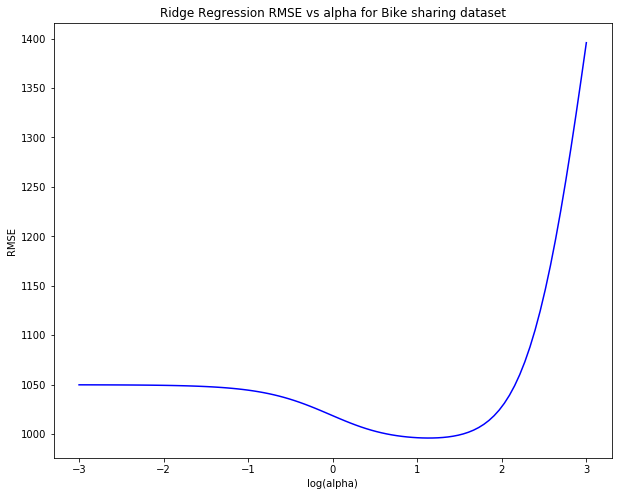

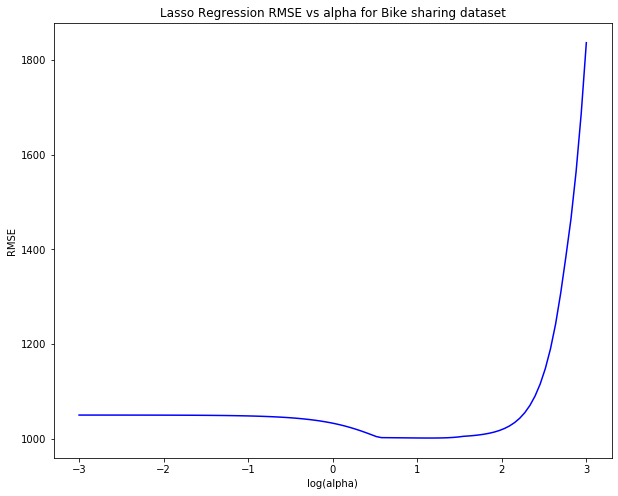

In [39]:
# For bike sharing data

from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train_rides, y_train_rides)
y_predict_rides = lr.predict(x_test_rides)
rmselr_rides = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
print('No normalization Linear regression RMSE for bike sharing dataset: ', rmselr_rides)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_rides = np.zeros_like(alpha_array)
rmsell_rides = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides, y_train_rides)
    y_predict_rides = rr.predict(x_test_rides)
    rmserr_rides[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides, y_train_rides)
    y_predict_rides = ll.predict(x_test_rides)
    rmsell_rides[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
    
idxrr_min = np.argmin(rmserr_rides)
rmsebestrr_rides = rmserr_rides[idxrr_min]
Alphabestrr_rides = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_rides)
rmsebestll_rides = rmsell_rides[idxll_min]
Alphabestll_rides = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_rides, ' alpha: ', Alphabestrr_rides)
print('Lasso regression RMSE: ', rmsebestll_rides, ' alpha: ', Alphabestll_rides)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_rides,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha for Bike sharing dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_rides,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha for Bike sharing dataset')

No normalization Linear regression RMSE for video transcoding dataset:  9.923113461084235
Ridge regression RMSE:  9.90894965308809  alpha:  5.72236765935022
Lasso regression RMSE:  9.908920688104748  alpha:  0.007054802310718645


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha for video transcoding dataset')

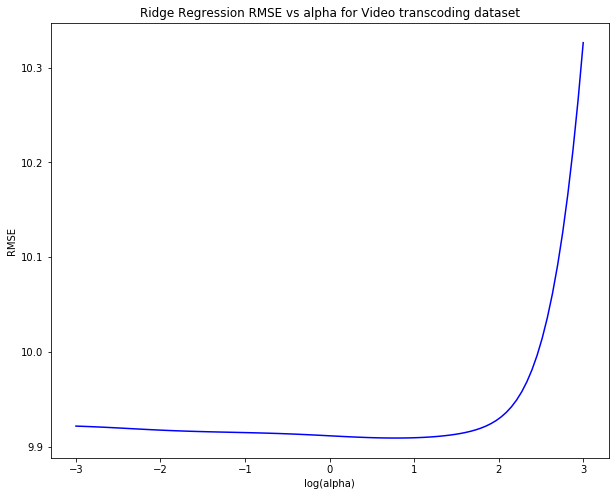

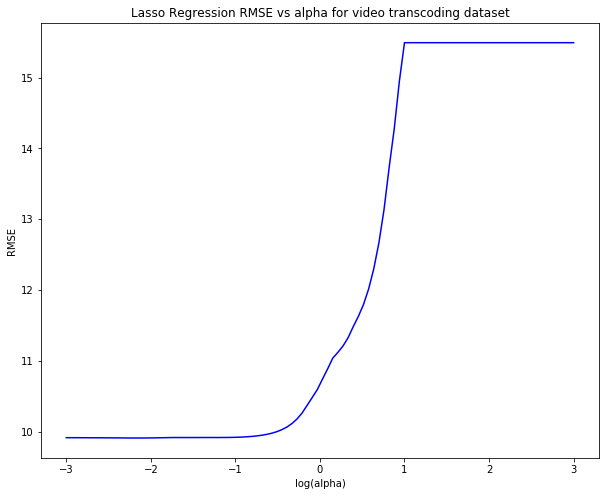

In [40]:
# Video dataset
lr = LinearRegression()
lr.fit(x_train_videos, y_train_videos)
y_predict_videos = lr.predict(x_test_videos)
rmselr_videos = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
print('No normalization Linear regression RMSE for video transcoding dataset: ', rmselr_videos)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_videos = np.zeros_like(alpha_array)
rmsell_videos = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos, y_train_videos)
    y_predict_videos = rr.predict(x_test_videos)
    rmserr_videos[it] = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos, y_train_videos)
    y_predict_videos = ll.predict(x_test_videos)
    rmsell_videos[it] = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
    
idxrr_min = np.argmin(rmserr_videos)
rmsebestrr_videos = rmserr_videos[idxrr_min]
Alphabestrr_videos = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_videos)
rmsebestll_videos = rmsell_videos[idxll_min]
Alphabestll_videos = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_videos, ' alpha: ', Alphabestrr_videos)
print('Lasso regression RMSE: ', rmsebestll_videos, ' alpha: ', Alphabestll_videos)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_videos,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha for Video transcoding dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_videos,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha for video transcoding dataset')

Performs better without feature selection

In [41]:
rides_features_drop = ['casual','registered','cnt']
X_ridesFinal = ridesStandard.drop(columns=rides_features_drop)
y_ridesFinal = ridesStandard['cnt']

x_train_rides, x_test_rides, y_train_rides, y_test_rides = train_test_split(X_ridesFinal, y_ridesFinal, test_size = 0.33, random_state = 42)

In [42]:
#Video dataset
videos_features_drop = ['utime']
X_videosFinal = videosStandard_ds.drop(columns=videos_features_drop)
y_videosFinal = videosStandard_ds['utime']

x_train_videos, x_test_videos, y_train_videos, y_test_videos = train_test_split(X_videosFinal, y_videosFinal, test_size = 0.33, random_state = 42)

In [43]:
# Without Feature Scaling Bike Sharing Dataset

rides_features_drop_wfs = ['casual','registered','cnt','dteday']
X_ridesFinal_wfs = rides_encode.drop(columns=rides_features_drop_wfs)
y_ridesFinal_wfs = rides_encode['cnt']

x_train_rides_wfs, x_test_rides_wfs, y_train_rides_wfs, y_test_rides_wfs = train_test_split(X_ridesFinal_wfs, y_ridesFinal_wfs, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE for bike sharing dataset:  873.3663299274137
Ridge regression RMSE:  848.2925939431237  alpha:  0.1747528400007685
Lasso regression RMSE:  854.0699360416311  alpha:  0.30538555088334157


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha without feature scaling for Bike sharing dataset')

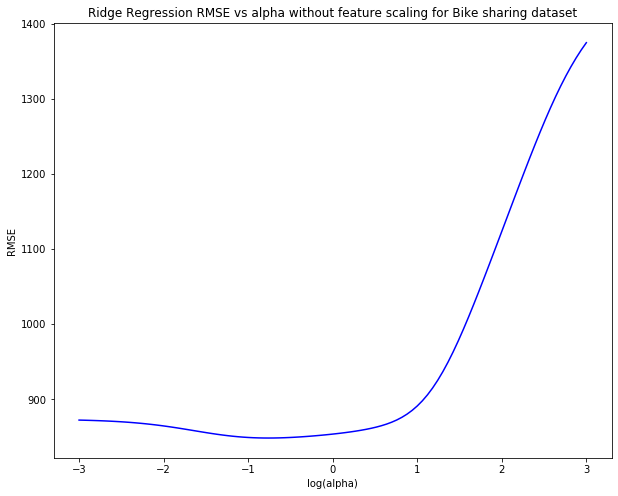

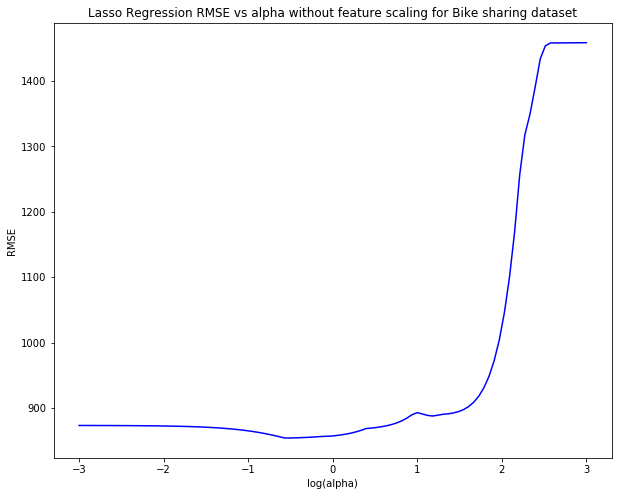

In [44]:
lr = LinearRegression()
lr.fit(x_train_rides_wfs, y_train_rides_wfs)
y_predict_rides_wfs = lr.predict(x_test_rides_wfs)
rmselr_rides_wfs = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
print('No normalization Linear regression RMSE for bike sharing dataset: ', rmselr_rides_wfs)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_rides_wfs = np.zeros_like(alpha_array)
rmsell_rides_wfs = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides_wfs, y_train_rides_wfs)
    y_predict_rides_wfs = rr.predict(x_test_rides_wfs)
    rmserr_rides_wfs[it] = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides_wfs, y_train_rides_wfs)
    y_predict_rides_wfs = ll.predict(x_test_rides_wfs)
    rmsell_rides_wfs[it] = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
    
idxrr_min = np.argmin(rmserr_rides_wfs)
rmsebestrr_rides_wfs = rmserr_rides_wfs[idxrr_min]
Alphabestrr_rides_wfs = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_rides_wfs)
rmsebestll_rides_wfs = rmsell_rides_wfs[idxll_min]
Alphabestll_rides_wfs = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_rides_wfs, ' alpha: ', Alphabestrr_rides_wfs)
print('Lasso regression RMSE: ', rmsebestll_rides_wfs, ' alpha: ', Alphabestll_rides_wfs)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_rides_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha without feature scaling for Bike sharing dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_rides_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha without feature scaling for Bike sharing dataset')

In [45]:
# Without Feature Scaling Video Dataset
videos_features_drop_wfs = ['utime','id']
X_videosFinal_wfs = videos_encode_ds.drop(columns=videos_features_drop_wfs)
y_videosFinal_wfs = videos_encode_ds['utime']

x_train_videos_wfs, x_test_videos_wfs, y_train_videos_wfs, y_test_videos_wfs = train_test_split(X_videosFinal_wfs, y_videosFinal_wfs, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE for video transcoding dataset:  9.403305995504487


C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91118e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140150.45961287688, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.64283e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140160.79137486254, tolerance: 76.95765867803549
  model = cd_fast.ene

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140718.3110476829, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41779e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140812.25524049107, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.23162e-22): result may not be accurate.
  return linalg.solve(

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146180.67907767257, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82451e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146990.74639376526, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.69711e-21): result may not be accurate.
  return linalg.solve

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171821.57498491797, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.24577e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172611.84124167607, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.18082e-20): result may not be accurate.
  return linalg.solve

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175872.57744868775, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.67988e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175875.44726733884, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.6772e-19): result may not be accurate.
  return linalg.solve(

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164388.26089251583, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.05231e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162764.70367620303, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.09704e-18): result may not be accurate.
  return linalg.solve

Ridge regression RMSE:  9.403306098741966  alpha:  0.001
Lasso regression RMSE:  9.398895934518873  alpha:  0.001


C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108053.68245823406, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha without feature scaling for video transcoding dataset')

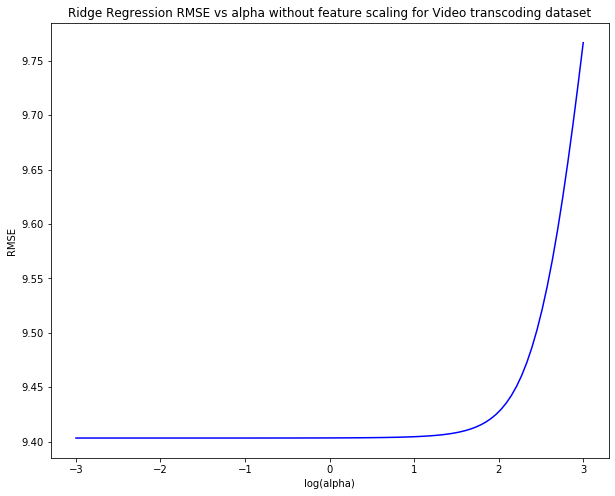

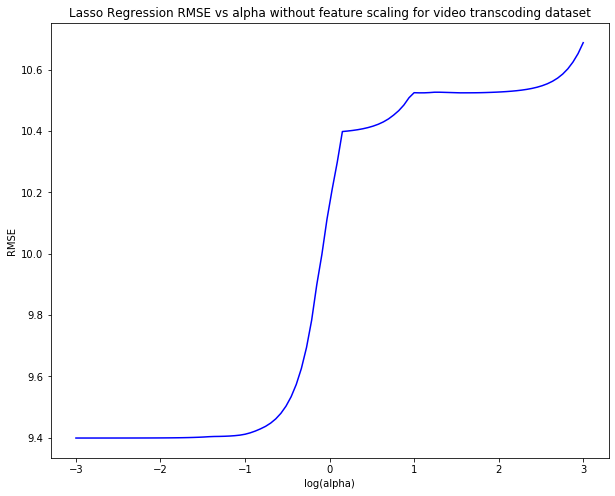

In [60]:
lr = LinearRegression()
lr.fit(x_train_videos_wfs, y_train_videos_wfs)
y_predict_videos_wfs = lr.predict(x_test_videos_wfs)
rmselr_videos_wfs = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
print('No normalization Linear regression RMSE for video transcoding dataset: ', rmselr_videos_wfs)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_videos_wfs = np.zeros_like(alpha_array)
rmsell_videos_wfs = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos_wfs, y_train_videos_wfs)
    y_predict_videos_wfs = rr.predict(x_test_videos_wfs)
    rmserr_videos_wfs[it] = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos_wfs, y_train_videos_wfs)
    y_predict_videos_wfs = ll.predict(x_test_videos_wfs)
    rmsell_videos_wfs[it] = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
    
idxrr_min = np.argmin(rmserr_videos_wfs)
rmsebestrr_videos_wfs = rmserr_videos_wfs[idxrr_min]
Alphabestrr_videos_wfs = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_videos_wfs)
rmsebestll_videos_wfs = rmsell_videos_wfs[idxll_min]
Alphabestll_videos_wfs = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_videos_wfs, ' alpha: ', Alphabestrr_videos_wfs)
print('Lasso regression RMSE: ', rmsebestll_videos_wfs, ' alpha: ', Alphabestll_videos_wfs)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_videos_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha without feature scaling for Video transcoding dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_videos_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha without feature scaling for video transcoding dataset')

Text(0.5, 1.0, 'p-value of each feature for Bike Sharing Dataset')

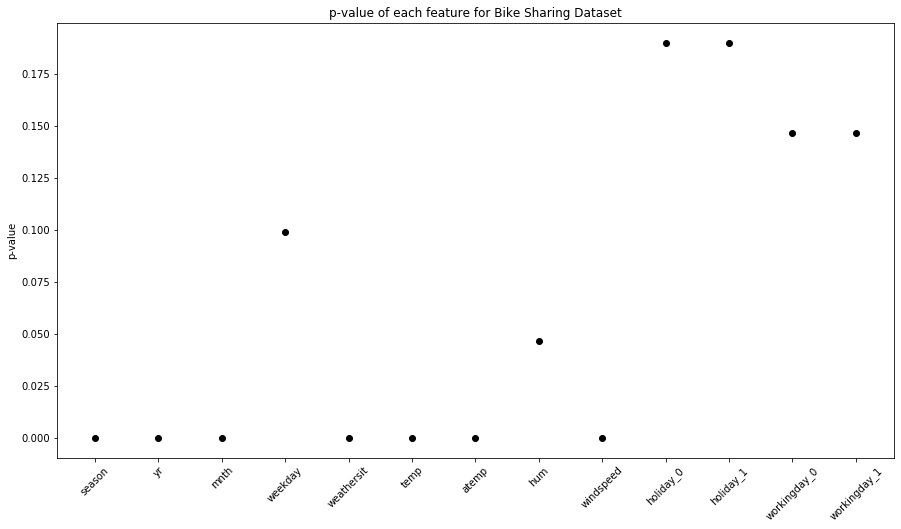

In [46]:
#p-values bike sharing dataset
from scipy import stats

features_rides = x_train_rides.columns
p_values_rides = []

for col in features_rides:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train_rides[col], y_train_rides)
    p_values_rides.append(p_value)
    
plt.figure(figsize = (15,8))
plt.plot(x_train_rides.columns,p_values_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('p-value of each feature for Bike Sharing Dataset')

C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'p-value of each feature for Bike Sharing Dataset')

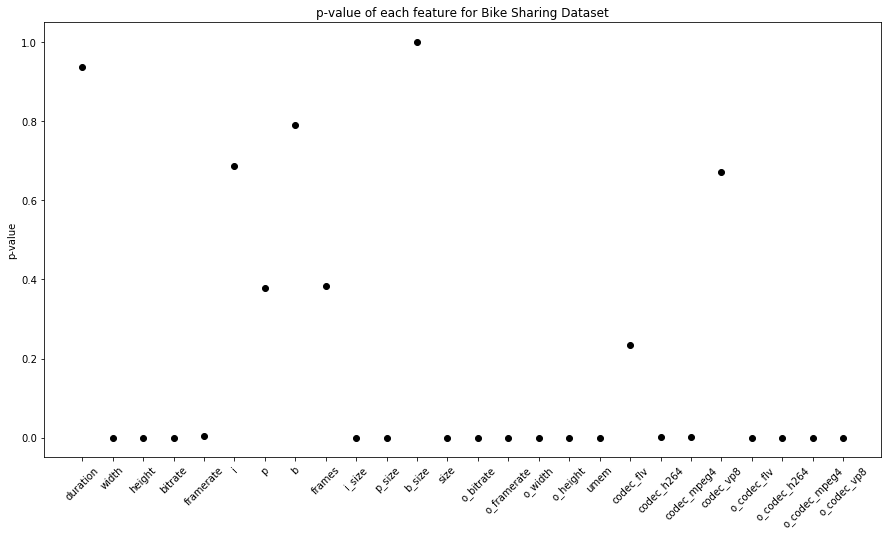

In [47]:
#p-values videos dataset

features_videos = x_train_videos.columns
p_values_videos = []

for col in features_videos:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train_videos[col], y_train_videos)
    p_values_videos.append(p_value)
    
plt.figure(figsize = (15,8))
plt.plot(x_train_videos.columns,p_values_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('p-value of each feature for Bike Sharing Dataset')

## Q13-14
Polynomial Regression

Polynomial Regression RMSE:  656  degree:  2


Text(0.5, 1.0, 'Polynomial Regression RMSE vs alpha for Bike sharing dataset')

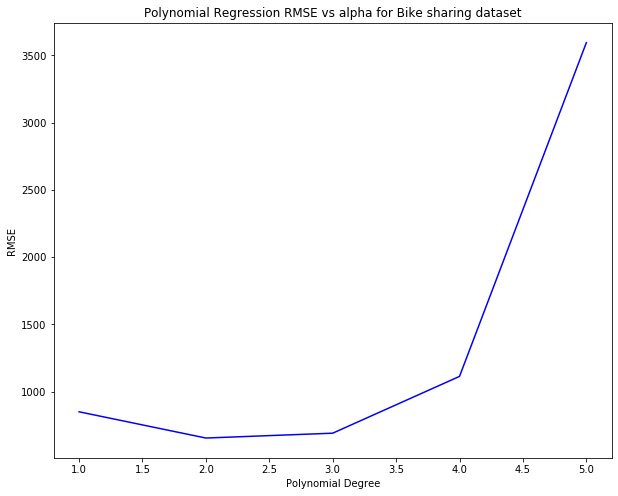

In [48]:
from sklearn.preprocessing import PolynomialFeatures

degrees_rides = np.arange(1,6)

rmserr_rides_poly = np.zeros_like(degrees_rides)
for it,degree in zip(np.arange(len(degrees_rides)),degrees_rides):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_rides_poly = polynomial_features.fit_transform(x_train_rides)
    x_test_rides_poly = polynomial_features.transform(x_test_rides)
    rr = Ridge(alpha=Alphabestrr_rides) #  comparison with alpha value
    rr.fit(x_train_rides_poly, y_train_rides)
    y_predict_rides_poly = rr.predict(x_test_rides_poly)
    rmserr_rides_poly[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides_poly, squared = False)
    
idxrr_min = np.argmin(rmserr_rides_poly)
rmserrbest_rides_poly = rmserr_rides_poly[idxrr_min]
degreerrbest_rides = degrees_rides[idxrr_min]
    
print('Polynomial Regression RMSE: ', rmserrbest_rides_poly, ' degree: ', degreerrbest_rides)

plt.figure(figsize = (10,8))
plt.plot(degrees_rides,rmserr_rides_poly,'b')
plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')
plt.title('Polynomial Regression RMSE vs alpha for Bike sharing dataset')

In [50]:
polynomial_features = PolynomialFeatures(degree=degreerrbest_rides)
x_train_rides_poly = polynomial_features.fit_transform(x_train_rides)
features_rides_poly = pd.DataFrame(polynomial_features.transform(x_train_rides), columns=polynomial_features.get_feature_names(x_train_rides.columns))
features_rides_poly.head()


,1,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,...,holiday_0^2,holiday_0 holiday_1,holiday_0 workingday_0,holiday_0 workingday_1,holiday_1^2,holiday_1 workingday_0,holiday_1 workingday_1,workingday_0^2,workingday_0 workingday_1,workingday_1^2
0,1.0,1.354375,0.998633,1.298767,0.500513,1.110427,-0.708221,-0.641156,-0.324784,-0.427920,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.354375,0.998633,1.298767,0.500513,-0.726048,-0.782890,-0.813407,-2.068522,2.031753,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.453512,0.998633,0.429089,-0.996930,-0.726048,1.232458,1.153825,-0.579471,-0.700811,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.453512,0.998633,0.139196,-1.496077,-0.726048,1.751794,1.696503,-0.766829,-0.283521,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,-1.348213,0.998633,-1.310268,1.498809,-0.726048,-1.118223,-1.342827,-1.630425,2.984780,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
mi_rides_poly = mutual_info_regression(X=features_rides_poly,y=y_train_rides)


In [63]:
idx_arg = mi_rides_poly.argsort()[-5:][::-1]
features_names_rides_poly = features_rides_poly.columns
salient_features_rides = features_names_rides_poly[idx_arg]
print(salient_features_rides)

Index(['atemp', 'atemp holiday_0', 'yr atemp', 'temp', 'yr mnth'], dtype='object')


No regularization causing an increase in the RMSE due to overfitting

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.24001e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


Polynomial Regression RMSE:  4  degree:  3


Text(0.5, 1.0, 'Polynomial Regression RMSE vs alpha for Video Transcoding dataset')

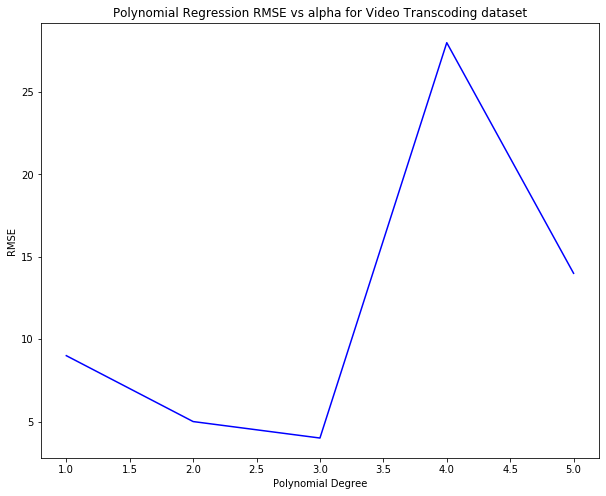

In [64]:
# Video Dataset Polynomial Regression with Ridge

degrees_videos = np.arange(1,6)

rmserr_videos_poly = np.zeros_like(degrees_videos)
for it,degree in zip(np.arange(len(degrees_videos)),degrees_videos):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_videos_poly = polynomial_features.fit_transform(x_train_videos)
    x_test_videos_poly = polynomial_features.transform(x_test_videos)
    rr = Ridge(alpha=Alphabestrr_videos) #  comparison with alpha value
    rr.fit(x_train_videos_poly, y_train_videos)
    y_predict_videos_poly = rr.predict(x_test_videos_poly)
    rmserr_videos_poly[it] = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos_poly, squared = False)
    
idxrr_min = np.argmin(rmserr_videos_poly)
rmserrbest_videos_poly = rmserr_videos_poly[idxrr_min]
degreerrbest_videos = degrees_videos[idxrr_min]
    
print('Polynomial Regression RMSE: ', rmserrbest_videos_poly, ' degree: ', degreerrbest_videos)

plt.figure(figsize = (10,8))
plt.plot(degrees_videos,rmserr_videos_poly,'b')
plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')
plt.title('Polynomial Regression RMSE vs alpha for Video Transcoding dataset')

In [65]:
polynomial_features = PolynomialFeatures(degree=degreerrbest_videos)
x_train_videos_poly = polynomial_features.fit_transform(x_train_videos)
features_videos_poly = pd.DataFrame(polynomial_features.transform(x_train_videos), columns=polynomial_features.get_feature_names(x_train_videos.columns))
features_videos_poly.head()

,1,duration,width,height,bitrate,framerate,i,p,b,frames,...,o_codec_h264^3,o_codec_h264^2 o_codec_mpeg4,o_codec_h264^2 o_codec_vp8,o_codec_h264 o_codec_mpeg4^2,o_codec_h264 o_codec_mpeg4 o_codec_vp8,o_codec_h264 o_codec_vp8^2,o_codec_mpeg4^3,o_codec_mpeg4^2 o_codec_vp8,o_codec_mpeg4 o_codec_vp8^2,o_codec_vp8^3
0,1.0,0.368996,1.417179,1.278120,-0.228258,0.101126,-0.292705,0.434106,-0.07142,0.422795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,-0.305974,-0.314670,-0.221997,-0.358107,-1.005017,0.119993,-0.563859,-0.07142,-0.556883,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,-0.537959,-0.972773,-1.122068,-0.579443,-1.559529,-0.851062,-0.811266,-0.07142,-0.814312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-0.118661,-0.314670,-0.221997,-0.391094,0.944506,-0.608298,0.172361,-0.07142,0.160099,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.020632,-0.314670,-0.221997,-0.193871,0.797146,0.666212,0.341412,-0.07142,0.344282,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
mi_videos_poly = mutual_info_regression(X=features_videos_poly,y=y_train_videos)

In [67]:
idx_arg = mi_videos_poly.argsort()[-5:][::-1]
features_names_videos_poly = features_videos_poly.columns
salient_features_videos = features_names_videos_poly[idx_arg]
print(salient_features_videos)

Index(['height o_width o_codec_flv', 'height o_height o_codec_flv',
       'width o_width o_codec_flv', 'bitrate o_width o_codec_flv',
       'width o_height o_codec_flv'],
      dtype='object')


## Q15
invf1 = (height * width)/bitrate
<br>
invf2 = (o_height * o_width)/o_bitrate

In [68]:
videos_encode_new = videos_encode_ds
videos_encode_new['invf1'] = (videos_encode_ds['height']*videos_encode_ds['width'])/videos_encode_ds['bitrate']
videos_encode_new['invf2'] = (videos_encode_ds['o_height']*videos_encode_ds['o_width'])/videos_encode_ds['o_bitrate']

videosStandard_new = videos_encode_new.drop(columns='id', inplace=False)

standard_columns_videos_new = videosStandard_new.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime'])
standard_scaler = preprocessing.StandardScaler()
videosStandard_new[standard_columns_videos_new] = standard_scaler.fit_transform(videosStandard_new[standard_columns_videos_new])

videos_features_drop_new = ['utime']
X_videosFinal_new = videosStandard_new.drop(columns=videos_features_drop_new)
y_videosFinal_new = videosStandard_new['utime']

x_train_videos_new, x_test_videos_new, y_train_videos_new, y_test_videos_new = train_test_split(X_videosFinal_new, y_videosFinal_new, test_size = 0.33, random_state = 42)

polynomial_features = PolynomialFeatures(degree=degreerrbest_videos)
x_train_videos_poly_new = polynomial_features.fit_transform(x_train_videos_new)
x_test_videos_poly_new = polynomial_features.transform(x_test_videos_new)
rr = Ridge(alpha=Alphabestrr_videos) #  comparison with alpha value
rr.fit(x_train_videos_poly_new, y_train_videos_new)
y_predict_videos_poly_new = rr.predict(x_test_videos_poly_new)
rmserr_videos_poly_new = mean_squared_error(y_true= y_test_videos_new,y_pred= y_predict_videos_poly_new, squared = False)
        
print('Polynomial Regression RMSE: ', rmserr_videos_poly_new, ' degree: ', degreerrbest_videos)

Polynomial Regression RMSE:  5.086093730551616  degree:  3


Neural Network

In [ ]:
#Bike Sharing Dataset
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(100,),(100,100),(100,100,100)],
             'activation':['identity','logistic','tanh','relu'],
             'alpha':[10,1,1e-1,1e-3,1e-5]}
mlp_rg = MLPRegressor(max_iter=1000000)
clf = GridSearchCV(estimator=mlp_rg,param_grid=parameters,n_jobs=-1,verbose=10)
clf.fit(X_ridesFinal, y_ridesFinal)

mlp_results = pd.DataFrame(clf.cv_results_)
mlp_results = mlp_results.sort_values(by=['mean_test_score'],ascending=False)

mlp_results

Activation Function: Relu and Identity seem to do very well
<br>


In [ ]:
parameters2_rides = {'hidden_layer_sizes':[(100,),(100,100),(200,),(200,200),(500,),(500,500),(1000,),(1000,1000)],
             'activation':['identity','relu'],
             'alpha':[10,1,1e-1,1e-3,1e-5]}
mlp_rg2_rides = MLPRegressor(max_iter=1000000)
clf2_rides = GridSearchCV(estimator=mlp_rg2_rides,param_grid=parameters2_rides,n_jobs=-1,verbose=10)
clf2_rides.fit(X_ridesFinal, y_ridesFinal)

mlp_results2_rides = pd.DataFrame(clf2_rides.cv_results_)
mlp_results2_rides = mlp_results2_rides.sort_values(by=['mean_test_score'],ascending=False)

mlp_results2_rides

In [ ]:
pd.set_option('display.max_rows',500)
mlp_results2_rides

Activation function relu seems to perform better as they are the top 5 results. Also, for relu very low alpha seem to perform worse. Also, large number of total neurons leads to overfitting. In next grid search, these constraints are added.

In [ ]:
parameters3_rides = {'hidden_layer_sizes':[(25,25),(25,25,25),(25,25,25,25),(50,),(50,50),(50,50,50),
                                           (75,),(75,75),(75,75,75),(100,),(25,50),(50,25),(50,100),(100,50,25),
                                          (25,50,100),(100,50),(25,50,75,100),(100,75,50,25),(100,25),(25,100),(100,100),
                                          (200,200),(300,300),(400,400),(500,500)],
             'activation':['relu'],
             'alpha':[1e4,1e3,100,10,1,1e-1]}
mlp_rg3_rides = MLPRegressor(max_iter=1000000)
clf3_rides = GridSearchCV(estimator=mlp_rg3_rides,param_grid=parameters3_rides,n_jobs=-1,verbose=10)
clf3_rides.fit(X_ridesFinal, y_ridesFinal)

mlp_results3_rides = pd.DataFrame(clf3_rides.cv_results_)
mlp_results3_rides = mlp_results3_rides.sort_values(by=['mean_test_score'],ascending=False)

mlp_results3_rides

In [ ]:
display_param_rides = ['rank_test_score','mean_test_score','param_activation','param_alpha','param_hidden_layer_sizes']
mlp_results3_rides[display_param_rides].head()

In [ ]:
mlpbest_rides = clf3_rides.best_estimator_
mlpbest_rides.fit(x_train_rides, y_train_rides)
y_predict_rides = mlpbest_rides.predict(x_test_rides)
rmsemlpbest_rides = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)

print('Neural Network for bike sharing dataset RMSE: ', rmsemlpbest_rides)

In [ ]:
parameters2_videos = {'hidden_layer_sizes':[(100,),(100,100),(200,),(200,200),(500,),(500,500),(1000,),(1000,1000)],
             'activation':['identity','relu'],
             'alpha':[10,1,1e-1,1e-3,1e-5]}
mlp_rg2_videos = MLPRegressor(max_iter=1000000)
clf2_videos = GridSearchCV(estimator=mlp_rg2_videos,param_grid=parameters2_videos,n_jobs=-1,verbose=10)
clf2_videos.fit(X_videosFinal, y_videosFinal)

mlp_results2_videos = pd.DataFrame(clf2_videos.cv_results_)
mlp_results2_videos = mlp_results2_videos.sort_values(by=['mean_test_score'],ascending=False)

mlp_results2_videos

In [ ]:
parameters3_videos = {'hidden_layer_sizes':[(50,50),(50,50,50),(25,25,25),(25,25,25,25),(75,75),(100,100),
                                            (50,200),(1000,10),(500,100),(100,100,100),(100,100,100,100),
                                           (100,100,100,100,100)],
             'activation':['relu'],
             'alpha':[1e4,1e3,100,10,1,1e-1]}
mlp_rg3_videos = MLPRegressor(max_iter=1000000)
clf3_videos = GridSearchCV(estimator=mlp_rg3_videos,param_grid=parameters3_videos,n_jobs=-1,verbose=10)
clf3_videos.fit(X_videosFinal, y_videosFinal)

mlp_results3_videos = pd.DataFrame(clf3_videos.cv_results_)
mlp_results3_videos = mlp_results3_videos.sort_values(by=['mean_test_score'],ascending=False)

mlp_results3_videos

In [ ]:
display_param_videos = ['rank_test_score','mean_test_score','param_activation','param_alpha','param_hidden_layer_sizes']
mlp_results3_videos[display_param_videos].head()

In [ ]:
mlpbest_videos = clf3_videos.best_estimator_
mlpbest_videos.fit(x_train_videos, y_train_videos)
y_predict_videos = mlpbest_videos.predict(x_test_videos)
rmsemlpbest_videos = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)

print('Neural Network for video transcoding RMSE: ', rmsemlpbest_videos)

Without Feature Selection

In [ ]:
X_ridesFinal_wfd.head()